<a href="https://colab.research.google.com/github/giauhuynh2002/HuynhPhatGiau-20104026/blob/main/Tu%E1%BA%A7n_3(20092022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 9.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=895545899f63840082b7acad06bccc894080df0f0e9715e6efc1b87b7904f49f
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
x= np.arange(11)
mfx = fuzz.trimf(x,[0,5,10])
x 
mfx

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

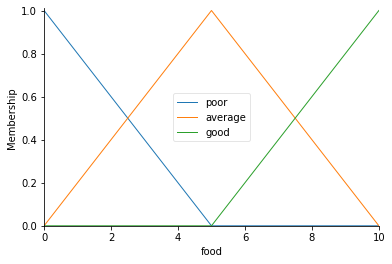

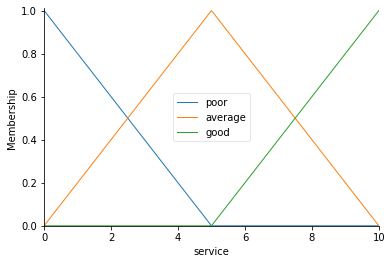

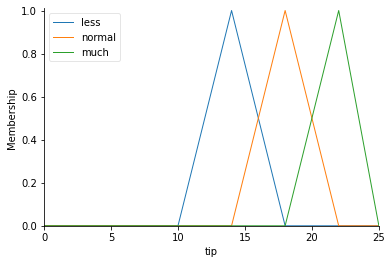

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service= ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(0,26,1),'tip')
food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['average']= fuzz.trimf(food.universe,[0,5,10])
food['good']= fuzz.trimf(food.universe,[5,10,10])
service['poor']= fuzz.trimf(service.universe,[0,0,5])
service['average']= fuzz.trimf(service.universe,[0,5,10])
service['good']= fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,14,18])
tip['normal']=fuzz.trimf(tip.universe,[14,18,22])
tip['much']=fuzz.trimf(tip.universe,[18,22,25])
food.view()
service.view()
tip.view()


17.516163602679207


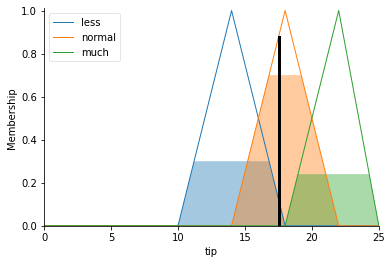

In [ ]:
rule1= ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule2= ctrl.Rule(food['poor'] & service['average'],tip['less'])
rule3= ctrl.Rule(food['poor'] & service['good'],tip['normal'])
rule4= ctrl.Rule(food['average'] & service['poor'],tip['less'])
rule5=ctrl.Rule(food['average'] & service['average'],tip['normal'])
rule6=ctrl.Rule(food['average'] & service['good'],tip['much'])
rule7=ctrl.Rule(food['good'] & service['poor'],tip['normal'])
rule8=ctrl.Rule(food['good'] & service['average'],tip['much'])
rule9=ctrl.Rule(food['poor'] & service['good'],tip['much'])
tipping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=6.2
tipping.input['service']=3.5
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

ValueError: ignored

29.676965510009037


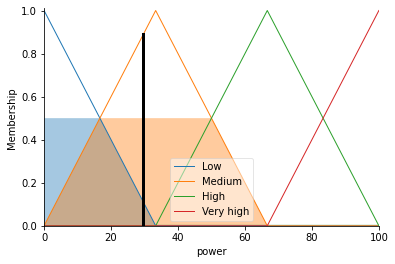

In [ ]:
import numpy as np
import skfuzzy.control as ctrl
x_rice = np.linspace(0, 1000, num=100)
x_time = np.linspace(0, 60, num=60)
x_power = np.linspace(0, 100, num=100)
rice = ctrl.Antecedent(x_rice, 'rice')
time = ctrl.Antecedent(x_time, 'time')
power = ctrl.Consequent(x_power, 'power')
names_rice = ['Less', 'Medium', 'Much']
names_time = ['Short', 'Medium', 'Long','Very Long']
names_power = ['Low', 'Medium', 'High','Very high']
rice.automf(names=names_rice)
time.automf(names=names_time)
power.automf(names=names_power)

rule1 = ctrl.Rule(rice['Less'] & time['Short'], power['Medium'])
rule2 = ctrl.Rule(rice['Medium'] & time['Short'], power['High'])
rule3 = ctrl.Rule(rice['Much'] & time['Short'], power['Very high'])
rule4 = ctrl.Rule(rice['Less'] & time['Medium'], power['Low'])
rule5 = ctrl.Rule(rice['Medium'] & time['Medium'], power['Medium'])
rule6 = ctrl.Rule(rice['Much'] & time['Medium'], power['High'])
rule7 = ctrl.Rule(rice['Less'] & time['Long'], power['Low'])
rule8 = ctrl.Rule(rice['Medium'] & time['Long'], power['Low'])
rule9 = ctrl.Rule(rice['Much'] & time['Long'], power['Medium'])
rule10 = ctrl.Rule(rice['Less'] & time['Very Long'], power['Low'])
rule11 = ctrl.Rule(rice['Medium'] & time['Very Long'], power['Low'])
rule12 = ctrl.Rule(rice['Much'] & time['Very Long'], power['Low'])
system_ctrl= ctrl.ControlSystem(rules=[rule1, rule1, rule2, rule3, rule4,
rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
system=ctrl.ControlSystemSimulation(system_ctrl)
system.input['rice']=500
system.input['time']=30
system.compute()
print(system.output['power'])
power.view(sim=system)